In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

##  use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task

In [3]:
df = pd.read_csv('../data/ab-test.csv')

In [4]:
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


## the figsize is still the same, the fontsize you can choose whatever you like
## the color palette should be as in the example
## the fontsize of the title is 15
## the width of the box lines is 3, the width of the median lines is 2

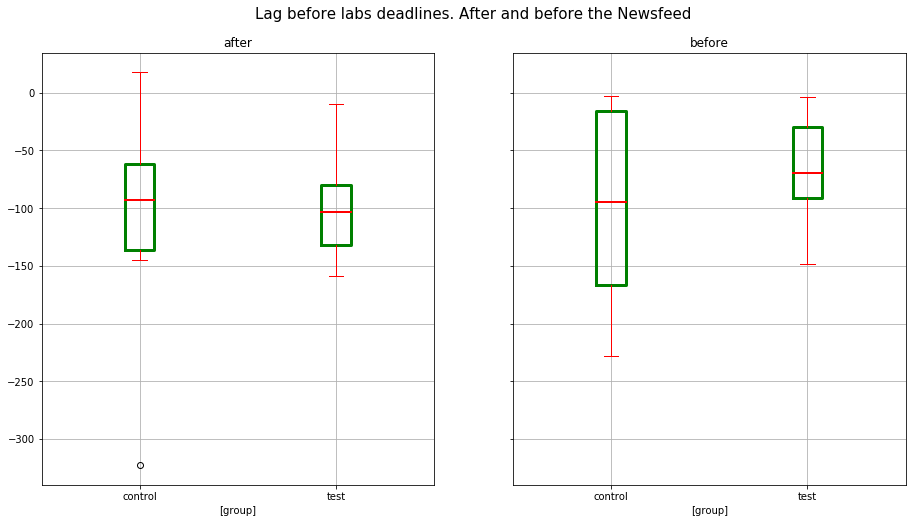

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

df[df['time'] == 'after'].boxplot(column=['diff'], by=['group'], ax = ax[0], 
                                  color=dict(boxes='g', whiskers='r', medians='r', caps='r'),
                                  boxprops=dict(linewidth=3),
                                  medianprops=dict(linewidth=2))

df[df['time'] == 'before'].boxplot(column='diff', by=['group'], ax = ax[1], 
                                  color=dict(boxes='g', whiskers='r', medians='r', caps='r'),
                                  boxprops=dict(linewidth=3),
                                  medianprops=dict(linewidth=2))
ax[0].set_title('after')
ax[1].set_title('before')
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

## What was the IQR of the control group before Newsfeed?

In [5]:
describe = df[(df['time']=='before')&(df['group']=='test')].describe()
int(round((describe.loc['75%'] - describe.loc['25%'])['diff']/10, 0) * 10)

60